# Dogs VS Cats (P.481-)
Kaggleで常設されているコンテスト（今回は縮小されたデータを使うが） 

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cat_and_dogs.zip", origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

68608000/68606236 [==============================] - 2s 0us/step


# Check the number of imgages

In [3]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

print("training cats",num_cats_tr)
print("training dogs",num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

print("validation cats",num_cats_val)
print("validation dogs",num_dogs_val)

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("total training",total_train)
print("total validation",total_val)


training cats 1000
training dogs 1000
validation cats 500
validation dogs 500
total training 2000
total validation 1000


# Preprocess data by ImageDataGenerator
### JPEG -> Tensor
pixel: 0-255(RGB) -> 0-1 (rescale=1.0/255)  
image size: 150*150  


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    class_mode="binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


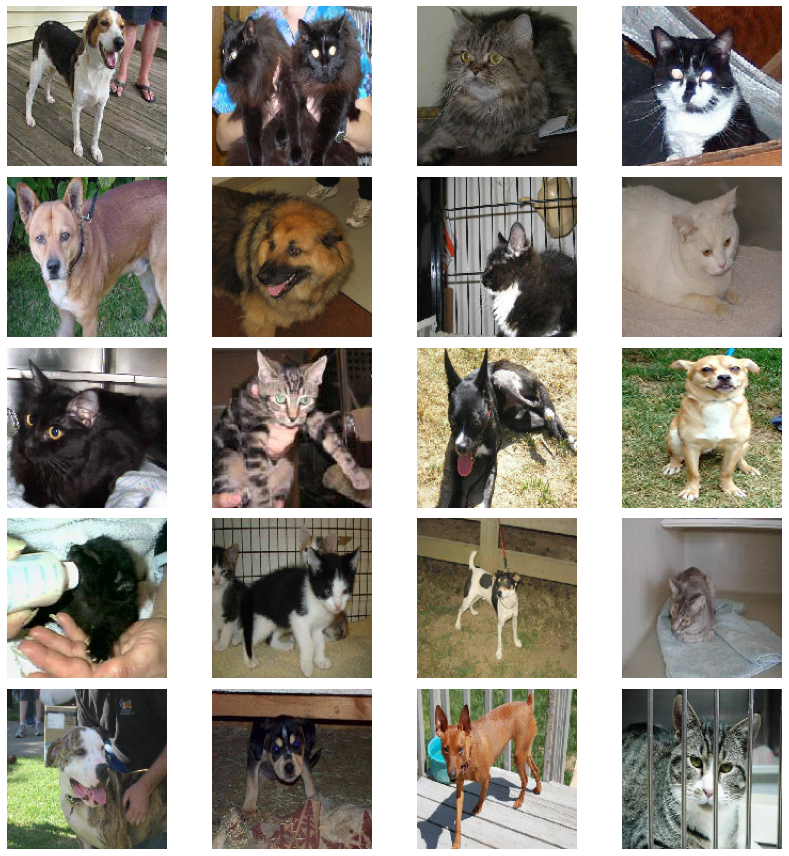

In [8]:
from matplotlib import pyplot as plt

sample_training_images, _ = next(train_data_gen)

def plotImage(images_arr):
    fig, axes = plt.subplots(5, 4, figsize=(12, 12))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plotImage(sample_training_images[:20])